In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
def r2(x, y):
    return pearsonr(x, y)[0] ** 2

In [3]:
df = pd.read_json("../data/raw-jsons/residues/pdb_library_1_combined_motifs_res_all.json")
df["ln_r_data"] = np.log(df["r_data"] + 0.0001)

In [31]:
df_non_wc = df.query("r_type == 'NON-WC'").copy()

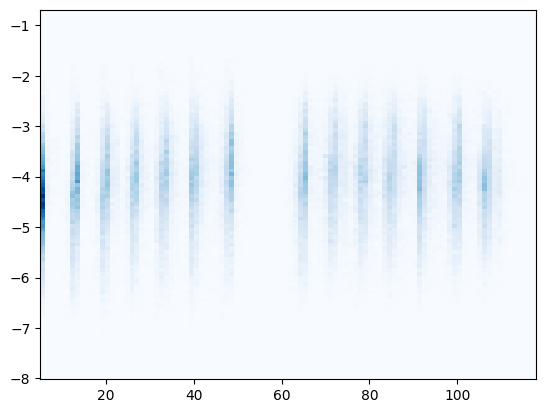

In [5]:
plt.hist2d(df_non_wc["nuc_pos"], df_non_wc["ln_r_data"], bins=100, cmap="Blues");

('CGAUGAG&CGAG', 2) 52 0.7020266376832545


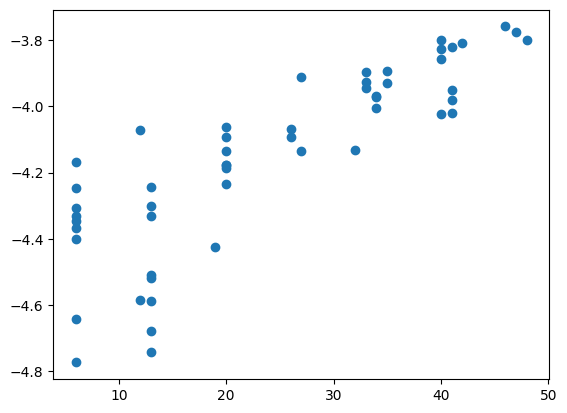

In [26]:
avg_r2 = 0
count = 0
for i, g in df.groupby(["m_sequence", "r_pos"]):
    r2_cor =  r2(g["nuc_pos"], g["ln_r_data"])
    avg_r2 += r2_cor
    count += 1
    if r2_cor > 0.7 and len(g) > 10:
        print(i, len(g), r2_cor)
        plt.scatter(g["nuc_pos"], g["ln_r_data"])
        break

In [19]:
print("Average R2: ", avg_r2 / count)

Average R2:  0.13683996243217722


In [32]:
df_non_wc["strand1"] = df_non_wc["m_sequence"].apply(lambda x: x.split("&")[0])
df_non_wc["strand2"] = df_non_wc["m_sequence"].apply(lambda x: x.split("&")[1])


/var/folders/wj/4ksnmwbd59g7774kql3ctq7h0000gq/T/ipykernel_18964/1306223016.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


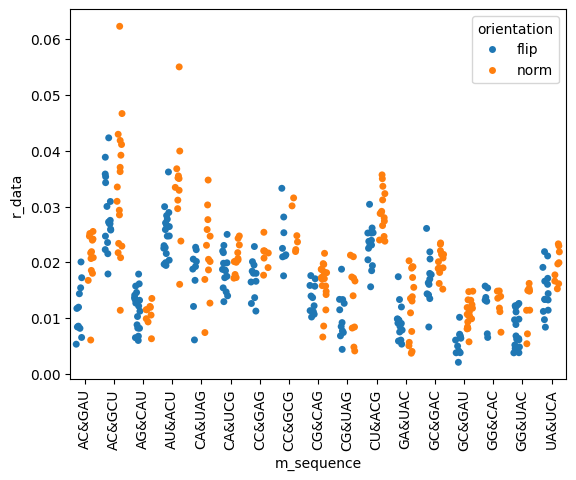

In [44]:
df_sub_1 = df_non_wc.query("m_token == '0x1' and r_pos == 4").copy()
df_sub_2 = df_non_wc.query("m_token == '1x0' and r_pos == 1").copy()
all_data = []
for i, g in df_sub_1.groupby("m_sequence"):
    strand1 = g["strand1"].values[0]
    strand2 = g["strand2"].values[0]
    df_flip = df_sub_2.query("strand1 == @strand2 and strand2 == @strand1").copy()
    if len(df_flip) == 0:
        continue
    df_flip["m_sequence"] = i
    df_flip["orientation"] = "flip"
    all_data.append(df_flip)
    g["orientation"] = "norm"
    all_data.append(g)
df_sub = pd.concat(all_data)
ax = sns.stripplot(data=df_sub, x="m_sequence", y="r_data", hue="orientation", dodge=True, jitter=0.2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
